In [1]:
import tensorflow as tf

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [4]:
train_generator = train_datagen.flow_from_directory(
                  'dataset_1/training_set',
                   target_size=(64,64),
                    batch_size=32,
                   class_mode='binary')

Found 8000 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
validator_generator = test_datagen.flow_from_directory(
                      'dataset_1/test_set',
                       target_size=(64,64),
                        batch_size=32,
                       class_mode='binary')

Found 2000 images belonging to 2 classes.


In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

In [8]:
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
#Add 1 more layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [14]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history=cnn.fit(x=train_generator,validation_data=validator_generator,epochs=5)

Epoch 1/5
250/250 [==============================] - 37s 150ms/step - loss: 0.5140 - accuracy: 0.7437 - val_loss: 0.4850 - val_accuracy: 0.7625
Epoch 2/5
250/250 [==============================] - 37s 150ms/step - loss: 0.4931 - accuracy: 0.7607 - val_loss: 0.5264 - val_accuracy: 0.7545
Epoch 3/5
250/250 [==============================] - 37s 149ms/step - loss: 0.4749 - accuracy: 0.7757 - val_loss: 0.4760 - val_accuracy: 0.7760
Epoch 4/5
250/250 [==============================] - 37s 149ms/step - loss: 0.4518 - accuracy: 0.7835 - val_loss: 0.5014 - val_accuracy: 0.7705
Epoch 5/5
250/250 [==============================] - 40s 160ms/step - loss: 0.4373 - accuracy: 0.7981 - val_loss: 0.4846 - val_accuracy: 0.7755


In [19]:
#make single prediction
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("dataset_1/singlepred_set/pred1.jpg",target_size=(64,64))
test_image =  image.img_to_array(test_image)
test_image=  np.expand_dims(test_image,axis=0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
    prediction='dog'
else:
    prediction='cat'

In [20]:
prediction

'cat'

In [21]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


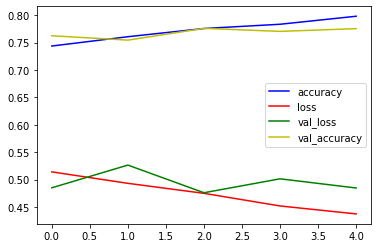

In [25]:
plt.plot(history.history['accuracy'] ,'-b', label='accuracy')
plt.plot(history.history['loss'],'-r', label='loss')
plt.plot(history.history['val_loss'], '-g', label='val_loss')
plt.plot(history.history['val_accuracy'], '-y', label='val_accuracy')
leg = plt.legend()